In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

In [ ]:
# Load food dataset
food_data = pd.read_csv("food.csv")

# Display basic information
food_data.info()
food_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Food_items       89 non-null     object 
 1   Breakfast        89 non-null     int64  
 2   Lunch            89 non-null     int64  
 3   Dinner           89 non-null     int64  
 4   VegNovVeg        89 non-null     object 
 5   Calories         89 non-null     int64  
 6   Fats             89 non-null     float64
 7   Proteins         89 non-null     float64
 8   Iron             89 non-null     float64
 9   Calcium          89 non-null     float64
 10  Sodium           89 non-null     int64  
 11  Potassium        89 non-null     float64
 12  Carbohydrates    89 non-null     float64
 13  Fibre            89 non-null     float64
 14  VitaminD         89 non-null     int64  
 15  Sugars           89 non-null     float64
 16  Diabetes         89 non-null     int64  
 17  Hypertension     8

,Food_items,Breakfast,Lunch,Dinner,VegNovVeg,Calories,Fats,Proteins,Iron,Calcium,...,Potassium,Carbohydrates,Fibre,VitaminD,Sugars,Diabetes,Hypertension,PCOS,Kidney Disease,Hyperthyroidism
0,Asparagus Cooked,0,1,1,,22,0.2,2.4,0.91,23.0,...,224.0,4.1,2.0,0,1.3,1,1,0,0,0
1,Avocados,1,0,0,0,160,15.0,2.0,0.55,12.0,...,485.0,8.5,6.7,0,0.7,1,1,1,0,0
2,Bananas,1,0,0,0,89,0.3,1.1,0.26,5.0,...,358.0,23.0,2.6,0,12.0,0,1,0,0,0
3,Bagels made in wheat,0,1,1,0,250,1.5,10.0,2.76,20.0,...,165.0,49.0,4.1,0,6.1,0,0,0,0,0
4,Berries,1,0,0,0,349,0.4,14.0,6.80,190.0,...,77.0,77.0,13.0,0,46.0,1,1,1,0,0


In [ ]:
food_data.describe()

,Breakfast,Lunch,Dinner,Calories,Fats,Proteins,Iron,Calcium,Sodium,Potassium,Carbohydrates,Fibre,VitaminD,Sugars,Diabetes,Hypertension,PCOS,Kidney Disease,Hyperthyroidism
count,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000
mean,0.471910,0.505618,0.685393,210.314607,8.577528,8.569663,3.709888,64.503371,250.887640,247.803371,26.473034,2.997753,11.516854,8.005056,0.280899,0.292135,0.280899,0.280899,0.280899
std,0.502039,0.502801,0.466990,155.350893,11.383888,8.841861,8.554230,112.045798,323.154074,194.792561,25.051777,5.037179,59.071819,16.444337,0.451985,0.457320,0.451985,0.451985,0.451985
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.020000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,89.000000,0.400000,2.300000,0.500000,8.300000,7.000000,117.000000,7.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,1.000000,184.000000,3.700000,4.500000,1.180000,18.000000,80.000000,211.000000,21.000000,1.500000,0.000000,1.300000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,318.000000,12.000000,13.000000,2.780000,63.000000,381.000000,334.000000,33.000000,3.100000,0.000000,5.700000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,579.000000,50.000000,46.000000,57.000000,631.000000,1531.000000,1129.000000,91.000000,34.000000,435.000000,82.000000,1.000000,1.000000,1.000000,1.000000,1.000000


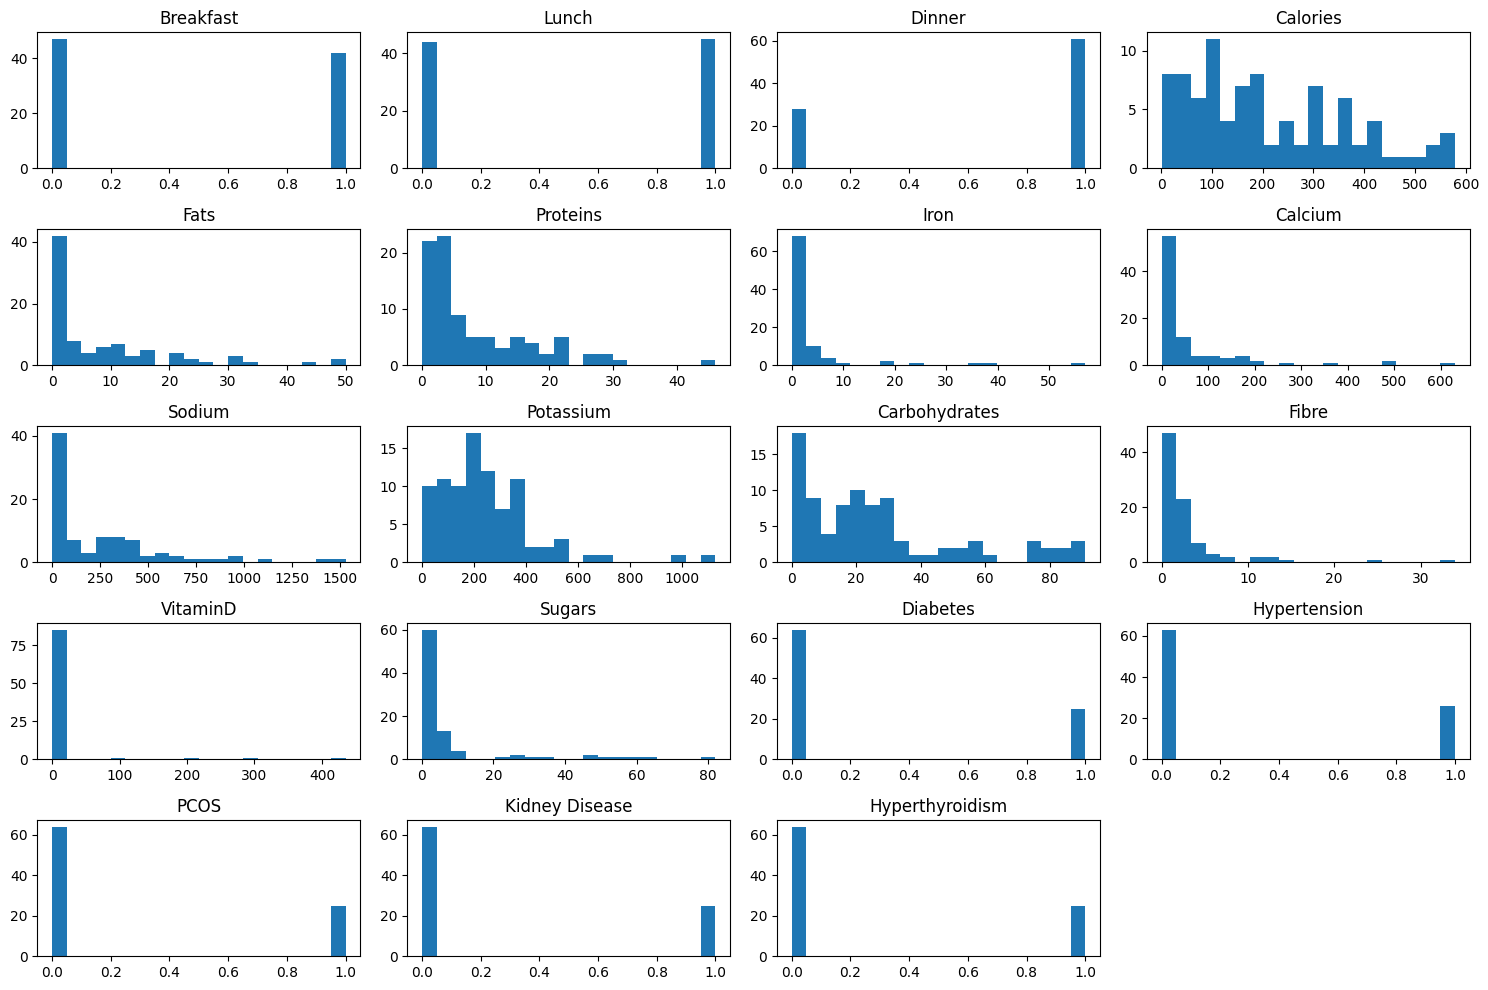

In [ ]:
# Plot histograms for numerical features
food_data.hist(bins=20, figsize=(15, 10), grid=False)
plt.tight_layout()
plt.show()


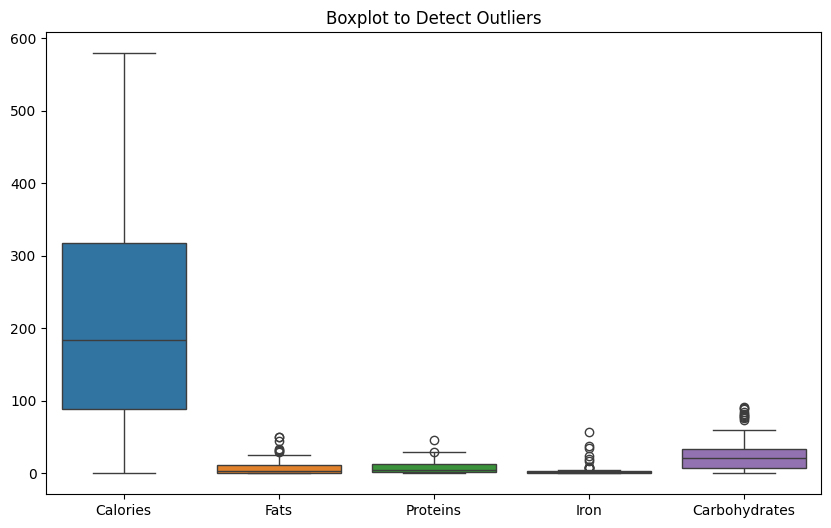

In [ ]:
# Boxplot to detect outliers for some key features
plt.figure(figsize=(10, 6))
sns.boxplot(data=food_data[['Calories', 'Fats', 'Proteins', 'Iron', 'Carbohydrates']])
plt.title('Boxplot to Detect Outliers')
plt.show()


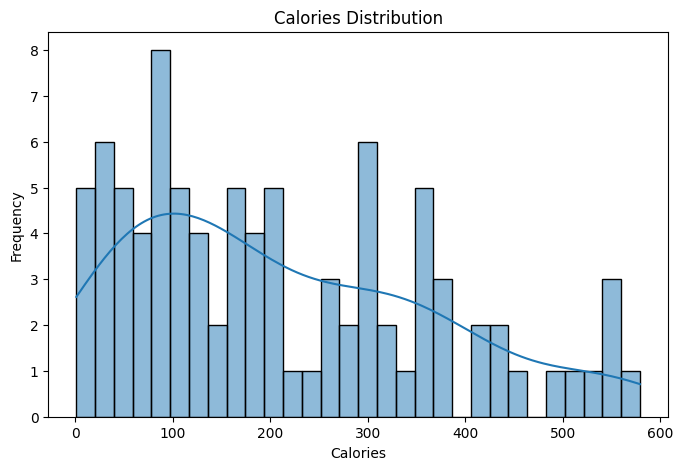

In [ ]:
# Visualizing distribution of Calories
plt.figure(figsize=(8, 5))
sns.histplot(food_data['Calories'], bins=30, kde=True)
plt.title("Calories Distribution")
plt.xlabel("Calories")
plt.ylabel("Frequency")
plt.show()

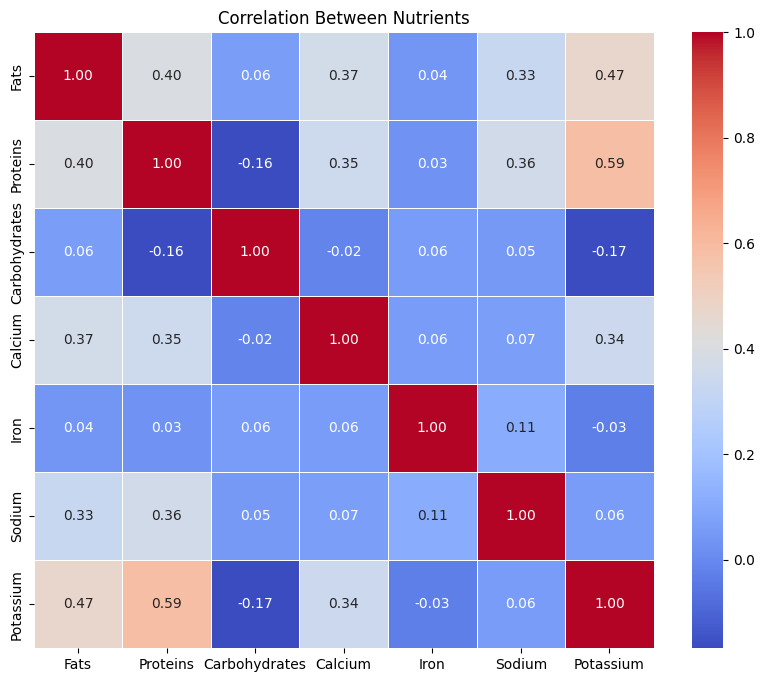

In [ ]:
#Correlation Between Nutrients
nutrients_corr = food_data[['Fats', 'Proteins', 'Carbohydrates', 'Calcium', 'Iron', 'Sodium', 'Potassium']]

plt.figure(figsize=(10, 8))
corr_nutrients = nutrients_corr.corr()
sns.heatmap(corr_nutrients, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Between Nutrients")
plt.show()


In [ ]:
import numpy as np
import pandas as pd

def calculate_nutrients(age, weight, height, gender, activity_level, disorders, food_data):
    """
    Calculate the user's daily nutrient requirements based on input parameters.
    """

    if isinstance(disorders, list):
        disorders = ",".join(disorders)

    # Step 1: Calculate Basal Metabolic Rate (BMR)
    if gender.lower() == "male":
        bmr = (10 * weight) + (6.25 * height) - (5 * age) + 5
    else:
        bmr = (10 * weight) + (6.25 * height) - (5 * age) - 161

    # Step 2: Apply Activity Level Multiplier
    activity_multipliers = {
        "sedentary": 1.2,
        "lightly_active": 1.375,
        "moderately_active": 1.55,
        "very_active": 1.725,
        "super_active": 1.9
    }
    tdee = bmr * activity_multipliers.get(activity_level, 1.2)  # Default to sedentary

    # Step 3: Set Macro & Micro Nutrient Recommendations
    user_nutrients = {
        "Calories": tdee,
        "Carbohydrates": tdee * 0.45 / 4,  # 45% of total calories, 4 kcal/g
        "Proteins": tdee * 0.2 / 4,        # 20% of total calories, 4 kcal/g
        "Fats": tdee * 0.25 / 9,           # 25% of total calories, 9 kcal/g
        "Fibre": 25 if tdee < 2000 else 30,
        "Sodium": 2300,
        "Potassium": 3500,
        "Calcium": 1000,
        "Iron": 8 if gender.lower() == "male" else 18,
        "VitaminD": 15
    }

    # Step 4: Adjust Nutrients Based on Disorders
    if disorders.lower() != "none":
        disorder_list = [d.strip().lower() for d in disorders.split(",")]

        if "diabetes" in disorder_list:
            user_nutrients["Carbohydrates"] *= 0.8  # Reduce carbs
            user_nutrients["Fibre"] += 5  # Increase fibre intake

        if "hypertension" in disorder_list:
            user_nutrients["Sodium"] = min(user_nutrients["Sodium"], 1500)
            user_nutrients["Potassium"] += 500  # Increase potassium

        if "pcos" in disorder_list:
            user_nutrients["Proteins"] += 10  # Increase protein
            user_nutrients["Carbohydrates"] *= 0.85  # Lower carbs
            user_nutrients["Fibre"] += 5  # Increase fibre

        if "kidney disease" in disorder_list:
            user_nutrients["Sodium"] = min(user_nutrients["Sodium"], 1500)
            user_nutrients["Potassium"] = max(user_nutrients["Potassium"] - 1000, 2000)  # Reduce potassium
            user_nutrients["Proteins"] *= 0.8  # Reduce protein

        if "hyperthyroidism" in disorder_list:
            user_nutrients["Calcium"] += 200  # Increase calcium
            user_nutrients["VitaminD"] += 5  # Increase vitamin D
            user_nutrients["Proteins"] += 10  # Increase protein intake

    return pd.Series(user_nutrients)


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
import numpy as np

def recommend_meals(nutrient_requirements, food_data, user_disorders, top_n=9):
    nutrient_columns = ["Calories", "Carbohydrates", "Proteins", "Fats", "Fibre", "Sodium", "Potassium", "Calcium", "Iron", "VitaminD"]

    # Filter by user's disorders
    for disorder in user_disorders:
        disorder = disorder.capitalize()  # Ensure column matches case
        if disorder in food_data.columns:
            food_data = food_data[food_data[disorder] == 1]  # Keep only foods marked as safe (1)

    #Preprocess - Standardize Values
    X = food_data[nutrient_columns]
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)


    user_input = np.array([nutrient_requirements[col] for col in nutrient_columns]).reshape(1, -1)
    user_input_scaled = scaler.transform(user_input)


    #Perform KNN to find closest neighbours
    knn = NearestNeighbors(n_neighbors=min(top_n, len(food_data)), metric='euclidean')
    knn.fit(X_scaled)
    distances, indices = knn.kneighbors(user_input_scaled)

    #Select best food options
    meal_recommendations = []
    total_calories = 0
    for idx in indices[0]:
        food_item = food_data.iloc[idx]["Food_items"]
        food_calories = food_data.iloc[idx]["Calories"]

        #Ensure total calories doesn't exceed
        if total_calories + food_calories <= nutrient_requirements["Calories"]:
            total_calories += food_calories
            #Classify into meal times
            meal_times = []
            if food_data.iloc[idx]["Breakfast"] == 1:
                meal_times.append("Breakfast")
            if food_data.iloc[idx]["Lunch"] == 1:
                meal_times.append("Lunch")
            if food_data.iloc[idx]["Dinner"] == 1:
                meal_times.append("Dinner")

            # Store as tuple (food item, suitable meal times)
            meal_recommendations.append((food_item, meal_times))

    return meal_recommendations


In [ ]:
#User Input Handling
def get_user_input():
    return {
        "age": int(input("Enter age: ")),
        "weight": float(input("Enter weight (kg): ")),
        "height": float(input("Enter height (cm): ")),
        "gender": input("Enter gender (male/female): ").strip().lower(),
        "activity_level": input("Enter activity level (sedentary, lightly_active, moderately_active, very_active, super_active): ").strip().lower(),
        "disorders": input("Enter any disorders (comma-separated, or 'none'): ").strip().lower().split(",") if input != "none" else []
    }


In [ ]:
# Get user input
user_input = get_user_input()

# Calculate user-specific nutrient requirements
user_nutrients = calculate_nutrients(
    user_input["age"],
    user_input["weight"],
    user_input["height"],
    user_input["gender"],
    user_input["activity_level"],
    user_input["disorders"],
    food_data
)

# Get meal recommendations
meal_recommendations = recommend_meals(user_nutrients, food_data, user_input["disorders"])


print("\nRecommended Meals:")
for food, meals in meal_recommendations:
    print(f"{food} (Can be consumed as: {', '.join(meals)})")



Enter age: 75
Enter weight (kg): 54
Enter height (cm): 160
Enter gender (male/female): male
Enter activity level (sedentary, lightly_active, moderately_active, very_active, super_active): lightly_active
Enter any disorders (comma-separated, or 'none'): diabetes

Recommended Meals:
Almonds (Can be consumed as: Breakfast)
Chia seeds (Can be consumed as: Breakfast)
Berries (Can be consumed as: Breakfast)
Lentils (Can be consumed as: Lunch, Dinner)
Cauliflower (Can be consumed as: Lunch, Dinner)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

def recommend_with_kmeans(nutrient_requirements, food_data, user_disorders, top_n=9):
    nutrient_columns = ["Calories", "Carbohydrates", "Proteins", "Fats", "Fibre", "Sodium", "Potassium", "Calcium", "Iron", "VitaminD"]

    # Filter by disorder
    for disorder in user_disorders:
        disorder = disorder.capitalize()
        if disorder in food_data.columns:
            food_data = food_data[food_data[disorder] == 1]

    # Preprocess
    X = food_data[nutrient_columns]
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Copy DataFrame to avoid warnings
    food_data = food_data.copy()
    food_data["Cluster"] = KMeans(n_clusters=5, random_state=42).fit_predict(X_scaled)

    # Find closest cluster
    user_input = np.array([nutrient_requirements[col] for col in nutrient_columns]).reshape(1, -1)
    user_input_scaled = scaler.transform(pd.DataFrame(user_input, columns=nutrient_columns))  # Fix feature names issue
    cluster_label = KMeans(n_clusters=5, random_state=42).fit(X_scaled).predict(user_input_scaled)[0]

    # Recommend from the same cluster
    cluster_foods = food_data[food_data["Cluster"] == cluster_label].head(top_n)

    recommendations = []
    for _, row in cluster_foods.iterrows():
        meal_times = []
        if row["Breakfast"] == 1:
            meal_times.append("Breakfast")
        if row["Lunch"] == 1:
            meal_times.append("Lunch")
        if row["Dinner"] == 1:
            meal_times.append("Dinner")

        recommendations.append((row["Food_items"], meal_times))

    return recommendations

# Get meal recommendations
meal_recommendations_km = recommend_with_kmeans(user_nutrients, food_data, user_input["disorders"])


print("\nRecommended Meals using K-Means:")
for food, meals in meal_recommendations_km:
    print(f"{food} (Can be consumed as: {', '.join(meals)})")



Recommended Meals using K-Means:
Berries (Can be consumed as: Breakfast)
Almonds (Can be consumed as: Breakfast)
Chia seeds (Can be consumed as: Breakfast)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

def recommend_meals_rf(nutrient_requirements, food_data, user_disorders, top_n=9):
    nutrient_columns = ["Calories", "Carbohydrates", "Proteins", "Fats", "Fibre", "Sodium", "Potassium", "Calcium", "Iron", "VitaminD"]

    # Filter by user's disorders
    for disorder in user_disorders:
        disorder = disorder.capitalize()
        if disorder in food_data.columns:
            food_data = food_data[food_data[disorder] == 1].copy()  # Ensure it's a new DataFrame

    # Preprocess - Standardize Values
    X = food_data[nutrient_columns]
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    X_scaled_df = pd.DataFrame(X_scaled, columns=nutrient_columns, index=food_data.index)  # Keep feature names & index

    # Prepare user input
    user_input = np.array([nutrient_requirements[col] for col in nutrient_columns]).reshape(1, -1)
    user_input_scaled = scaler.transform(user_input)
    user_input_scaled_df = pd.DataFrame(user_input_scaled, columns=nutrient_columns)  # Convert to DataFrame

    # Train Random Forest Model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_scaled_df, food_data["Calories"])  # Using Calories as target

    # Predict Scores
    food_data = food_data.copy()  # Avoid modifying a slice
    food_data.loc[:, "Score"] = model.predict(X_scaled_df)  # Use .loc to avoid warning

    # Sort food items based on Score
    recommended_foods = food_data.sort_values(by="Score", ascending=False).head(top_n)

    # Select best food options
    meal_recommendations = []
    total_calories = 0

    for _, row in recommended_foods.iterrows():
        food_item = row["Food_items"]
        food_calories = row["Calories"]

        if total_calories + food_calories <= nutrient_requirements["Calories"]:
            total_calories += food_calories
            meal_times = []

            if row["Breakfast"] == 1:
                meal_times.append("Breakfast")
            if row["Lunch"] == 1:
                meal_times.append("Lunch")
            if row["Dinner"] == 1:
                meal_times.append("Dinner")

            meal_recommendations.append((food_item, meal_times))

    return meal_recommendations

# Get meal recommendations
meal_recommendations_rf = recommend_meals_rf(user_nutrients, food_data, user_input["disorders"])


print("\nRecommended Meals using Random Forest:")
for food, meals in meal_recommendations_rf:
    print(f"{food} (Can be consumed as: {', '.join(meals)})")



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Recommended Meals using Random Forest:
Almonds (Can be consumed as: Breakfast)
Chia seeds (Can be consumed as: Breakfast)
Berries (Can be consumed as: Breakfast)
Avocados (Can be consumed as: Breakfast)



User Nutrient Requirements:
Calories: 1608.75
Carbohydrates: 144.79
Proteins: 80.44
Fats: 44.69
Fibre: 30.00
Sodium: 2300.00
Potassium: 3500.00
Calcium: 1000.00
Iron: 8.00
VitaminD: 15.00

Recommended Nutrients (KNN):
Calories: 1680.00
Carbohydrates: 195.60
Proteins: 75.60
Fats: 83.00
Fibre: 66.60
Sodium: 1325.00
Potassium: 2341.00
Calcium: 1182.00
Iron: 25.87
VitaminD: 0.00


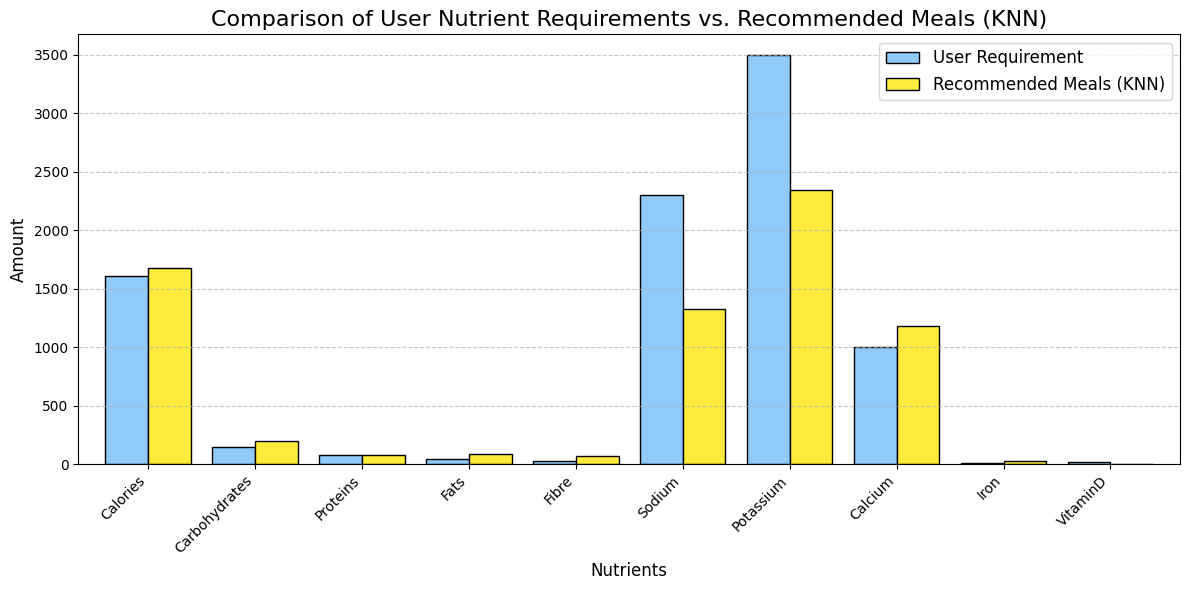


Recommended Nutrients (K-Means):
Calories: 1414.00
Carbohydrates: 141.00
Proteins: 52.00
Fats: 81.40
Fibre: 60.00
Sodium: 315.00
Potassium: 1217.00
Calcium: 1090.00
Iron: 18.23
VitaminD: 0.00


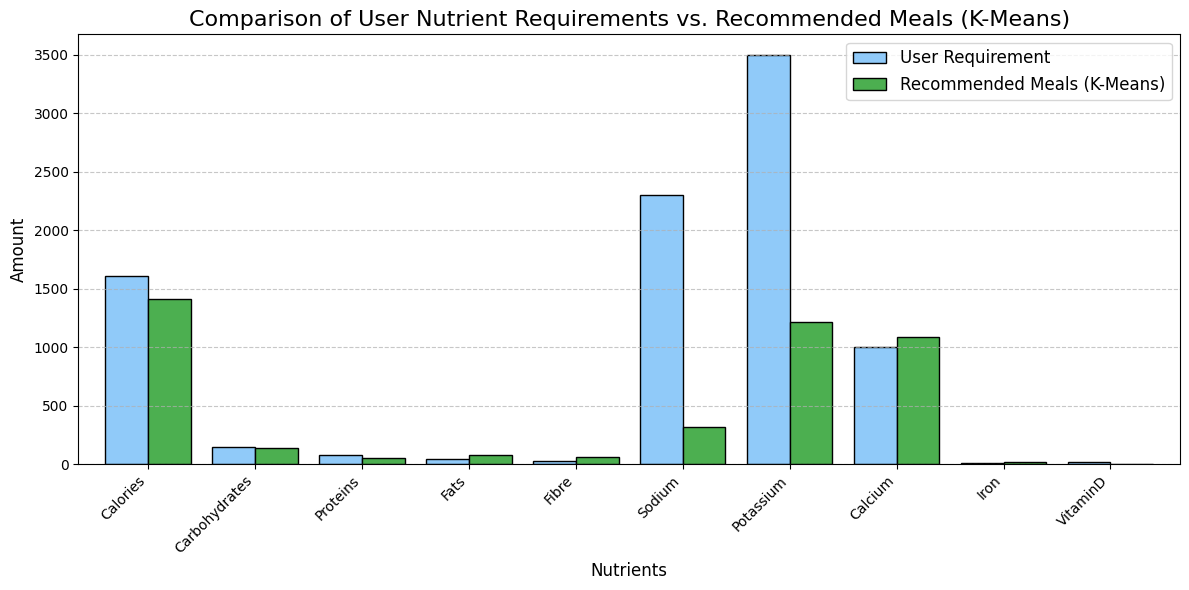


Recommended Nutrients (Random Forest):
Calories: 1574.00
Carbohydrates: 149.50
Proteins: 54.00
Fats: 96.40
Fibre: 66.70
Sodium: 322.00
Potassium: 1702.00
Calcium: 1102.00
Iron: 18.78
VitaminD: 0.00


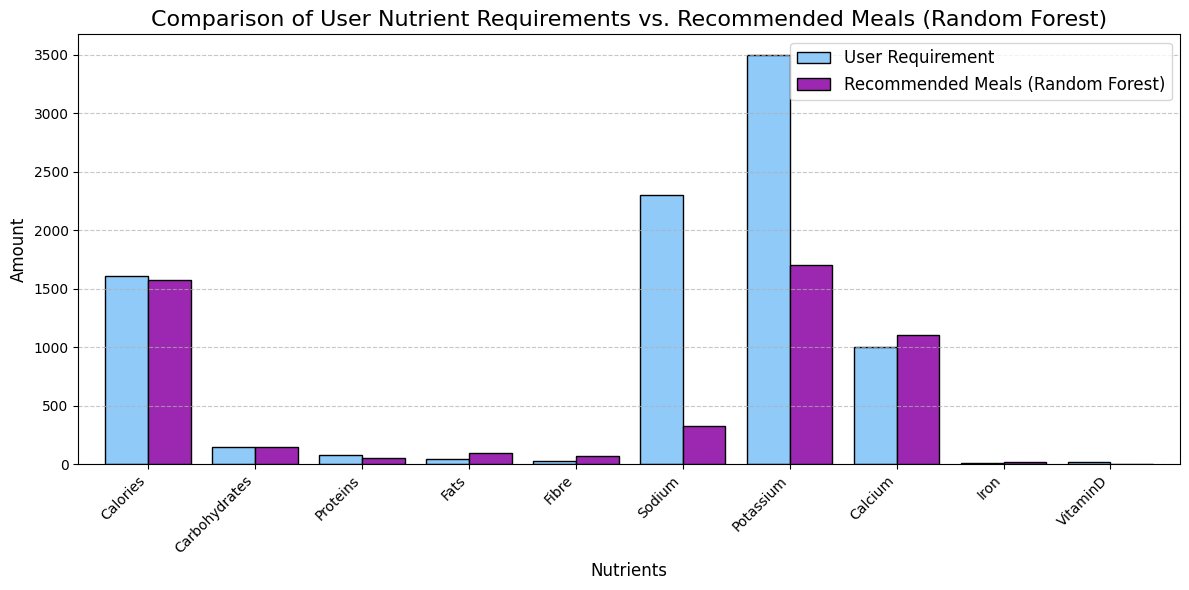

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Function to plot nutrient comparison with unique title, legend, and color
def plot_nutrient_comparison(meal_recommendations, user_nutrients, food_data, model_name, colors, plot=True):
    nutrient_columns = ["Calories", "Carbohydrates", "Proteins", "Fats", "Fibre", "Sodium", "Potassium", "Calcium", "Iron", "VitaminD"]

    # Organizing food items into meal times
    recommendations_by_meal = {"Breakfast": [], "Lunch": [], "Dinner": []}
    for food, meal_times in meal_recommendations:
        for meal in meal_times:
            recommendations_by_meal[meal].append(food)

    # Initializing recommended nutrient dictionary
    recommended_nutrients = {nutrient: 0 for nutrient in nutrient_columns}

    # Summing up nutrients from recommended meals
    for meal, foods in recommendations_by_meal.items():
        for food in foods:
            food_nutrients = food_data[food_data["Food_items"] == food][nutrient_columns]
            if not food_nutrients.empty:
                for nutrient in nutrient_columns:
                    recommended_nutrients[nutrient] += food_nutrients[nutrient].values[0]

    # Creating a DataFrame for visualization
    nutrient_df = pd.DataFrame({
        "User Requirement": user_nutrients,
        "Recommended Meals": recommended_nutrients
    })


    print(f"\nRecommended Nutrients ({model_name}):")
    for nutrient, value in recommended_nutrients.items():
        print(f"{nutrient}: {value:.2f}")

    if plot:
        ax = nutrient_df.plot(kind="bar", figsize=(12, 6), width=0.8, color=colors, edgecolor='black')

        plt.title(f"Comparison of User Nutrient Requirements vs. Recommended Meals ({model_name})", fontsize=16)
        plt.xlabel("Nutrients", fontsize=12)
        plt.ylabel("Amount", fontsize=12)
        plt.xticks(rotation=45, ha="right", fontsize=10)
        plt.yticks(fontsize=10)
        plt.legend(["User Requirement", f"Recommended Meals ({model_name})"], fontsize=12)

        ax.grid(True, axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()

    return recommended_nutrients



print("\nUser Nutrient Requirements:")
for nutrient, value in user_nutrients.items():
    print(f"{nutrient}: {value:.2f}")


recommended_nutrients_knn = plot_nutrient_comparison(meal_recommendations, user_nutrients, food_data, "KNN", ['#90CAF9', '#FFEB3B'])
recommended_nutrients_km = plot_nutrient_comparison(meal_recommendations_km, user_nutrients, food_data, "K-Means", ['#90CAF9', '#4CAF50'])
recommended_nutrients_rf = plot_nutrient_comparison(meal_recommendations_rf, user_nutrients, food_data, "Random Forest", ['#90CAF9', '#9C27B0'])




Recommended Nutrients (KNN):
Calories: 1680.00
Carbohydrates: 195.60
Proteins: 75.60
Fats: 83.00
Fibre: 66.60
Sodium: 1325.00
Potassium: 2341.00
Calcium: 1182.00
Iron: 25.87
VitaminD: 0.00

Recommended Nutrients (K-Means):
Calories: 1414.00
Carbohydrates: 141.00
Proteins: 52.00
Fats: 81.40
Fibre: 60.00
Sodium: 315.00
Potassium: 1217.00
Calcium: 1090.00
Iron: 18.23
VitaminD: 0.00

Recommended Nutrients (Random Forest):
Calories: 1574.00
Carbohydrates: 149.50
Proteins: 54.00
Fats: 96.40
Fibre: 66.70
Sodium: 322.00
Potassium: 1702.00
Calcium: 1102.00
Iron: 18.78
VitaminD: 0.00

Model: KNN
MAPE: 49.66%
Cosine Similarity: 0.9718

Model: K-Means
MAPE: 62.06%
Cosine Similarity: 0.8313

Model: Random Forest
MAPE: 65.87%
Cosine Similarity: 0.8684


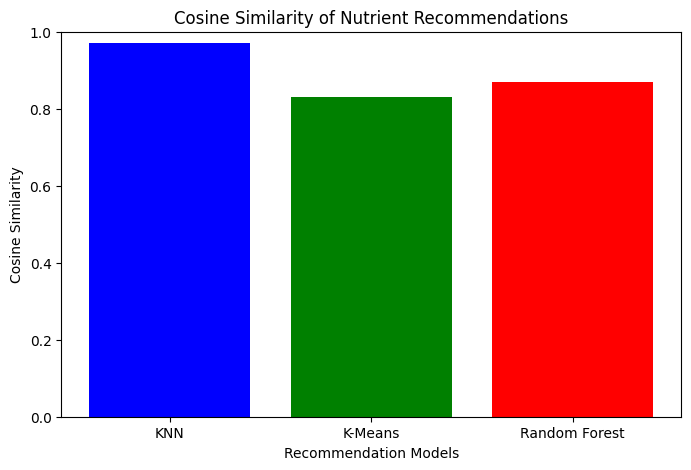

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error
from scipy.spatial.distance import cosine
from scipy.stats import iqr

def compute_mape_cosine(user_nutrients, recommended_nutrients):
    # Convert to numpy arrays
    required_nutrients = np.array(list(user_nutrients.values()))
    recommended_nutrients = np.array(list(recommended_nutrients.values()))

    # Compute percentage errors
    percentage_errors = np.abs((required_nutrients - recommended_nutrients) / required_nutrients) * 100

    # Compute IQR to detect outliers
    q1, q3 = np.percentile(percentage_errors, [25, 75])
    iqr_value = iqr(percentage_errors)
    lower_bound = q1 - 1.5 * iqr_value
    upper_bound = q3 + 1.5 * iqr_value

    non_outlier_indices = np.where((percentage_errors >= lower_bound) & (percentage_errors <= upper_bound))[0]

    filtered_required = required_nutrients[non_outlier_indices]
    filtered_recommended = recommended_nutrients[non_outlier_indices]

    if len(filtered_required) == 0 or len(filtered_recommended) == 0:
        print("No valid values after filtering outliers for MAPE.")
        return None, None

    filtered_mape = mean_absolute_percentage_error(filtered_required, filtered_recommended) * 100
    cosine_sim = 1 - cosine(required_nutrients, recommended_nutrients)

    return filtered_mape, cosine_sim


knn_nutrients = plot_nutrient_comparison(meal_recommendations, user_nutrients, food_data, "KNN", None, plot=False)
km_nutrients = plot_nutrient_comparison(meal_recommendations_km, user_nutrients, food_data, "K-Means", None, plot=False)
rf_nutrients = plot_nutrient_comparison(meal_recommendations_rf, user_nutrients, food_data, "Random Forest", None, plot=False)


user_nutrients_dict = user_nutrients.to_dict() if isinstance(user_nutrients, pd.Series) else user_nutrients


models = ["KNN", "K-Means", "Random Forest"]
cosine_similarities = []

# Compute and print Accuracy Metrics for each model
for model_name, recommended_nutrients in zip(models, [knn_nutrients, km_nutrients, rf_nutrients]):
    mape, cosine_sim = compute_mape_cosine(user_nutrients_dict, recommended_nutrients)

    if mape is not None and cosine_sim is not None:
        print(f"\nModel: {model_name}")
        print(f"MAPE: {mape:.2f}%")
        print(f"Cosine Similarity: {cosine_sim:.4f}")
        cosine_similarities.append(cosine_sim)
    else:
        print(f"Error in calculating metrics for {model_name} due to missing valid data.")
        cosine_similarities.append(0)


plt.figure(figsize=(8, 5))
plt.bar(models, cosine_similarities, color=['blue', 'green', 'red'])
plt.xlabel("Recommendation Models")
plt.ylabel("Cosine Similarity")
plt.title("Cosine Similarity of Nutrient Recommendations")
plt.ylim(0, 1)  # Cosine similarity ranges from 0 to 1
plt.show()
